<a href="https://colab.research.google.com/github/ocalzada/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/calzada_oscar_LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
%matplotlib inline

#import rcParams to set font styles
from matplotlib import rcParams

#Set font style and size
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Read a dataset for life expectancy from a CSV file hosted online
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
life_expect = pd.read_csv(url)

In [3]:
#let's find out how many rows and colums the dataframe has
life_expect.shape

(1704, 6)

In [4]:
life_expect.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [5]:
life_expect.info()
#dataframe has 1704 rows, and every column has 1704 non-null entries, thus 
# no missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
year         1704 non-null int64
pop          1704 non-null float64
continent    1704 non-null object
lifeExp      1704 non-null float64
gdpPercap    1704 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [6]:
#let's find out how many entries are available per year
life_expect['year'].value_counts()
# there are 142 entries/year

2007    142
2002    142
1997    142
1992    142
1987    142
1982    142
1977    142
1972    142
1967    142
1962    142
1957    142
1952    142
Name: year, dtype: int64

In [7]:
#getting familiar with groupby method

by_year = life_expect.groupby('year')
type(by_year)

pandas.core.groupby.generic.DataFrameGroupBy

In [10]:
by_year.first()

,country,pop,continent,lifeExp,gdpPercap
year,,,,,
1952,Afghanistan,8425333.0,Asia,28.801,779.445314
1957,Afghanistan,9240934.0,Asia,30.332,820.853030
1962,Afghanistan,10267083.0,Asia,31.997,853.100710
1967,Afghanistan,11537966.0,Asia,34.020,836.197138
1972,Afghanistan,13079460.0,Asia,36.088,739.981106
1977,Afghanistan,14880372.0,Asia,38.438,786.113360
1982,Afghanistan,12881816.0,Asia,39.854,978.011439
1987,Afghanistan,13867957.0,Asia,40.822,852.395945
1992,Afghanistan,16317921.0,Asia,41.674,649.341395


In [0]:
Afghanistan = by_year.first()

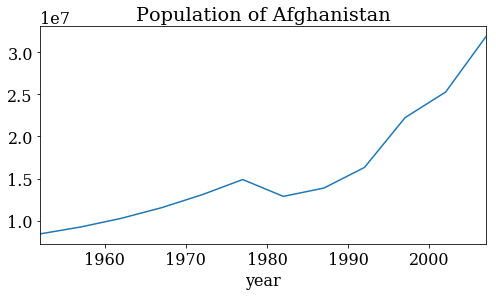

In [14]:
Afghanistan['pop'].plot(figsize=(8,4),
                        title='Population of Afghanistan');

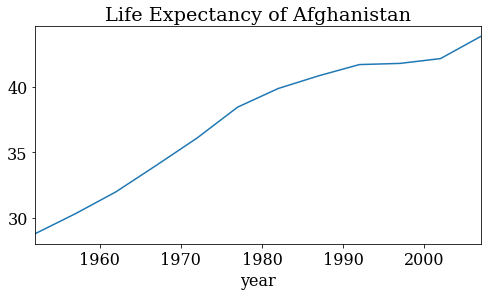

In [21]:
Afghanistan['lifeExp'].plot(figsize=(8,4),
                       title='Life Expectancy of Afghanistan');

In [22]:
Afghanistan.describe()

,pop,lifeExp,gdpPercap
count,1.200000e+01,12.000000,12.000000
mean,1.582372e+07,37.478833,802.674598
std,7.114583e+06,5.098646,108.202929
min,8.425333e+06,28.801000,635.341351
25%,1.122025e+07,33.514250,736.669343
50%,1.347371e+07,39.146000,803.483195
75%,1.779529e+07,41.696250,852.572136
max,3.188992e+07,43.828000,978.011439


In [0]:
#grouping data by country
by_country = life_expect.groupby('country')

In [25]:
year1952 = by_country.first()
type(year1952)

pandas.core.frame.DataFrame

In [26]:
year1952.head()

,year,pop,continent,lifeExp,gdpPercap
country,,,,,
Afghanistan,1952,8425333.0,Asia,28.801,779.445314
Albania,1952,1282697.0,Europe,55.230,1601.056136
Algeria,1952,9279525.0,Africa,43.077,2449.008185
Angola,1952,4232095.0,Africa,30.015,3520.610273
Argentina,1952,17876956.0,Americas,62.485,5911.315053


In [27]:
year1952['pop'].min()

60011.0

In [0]:
populations = year1952['pop'].values

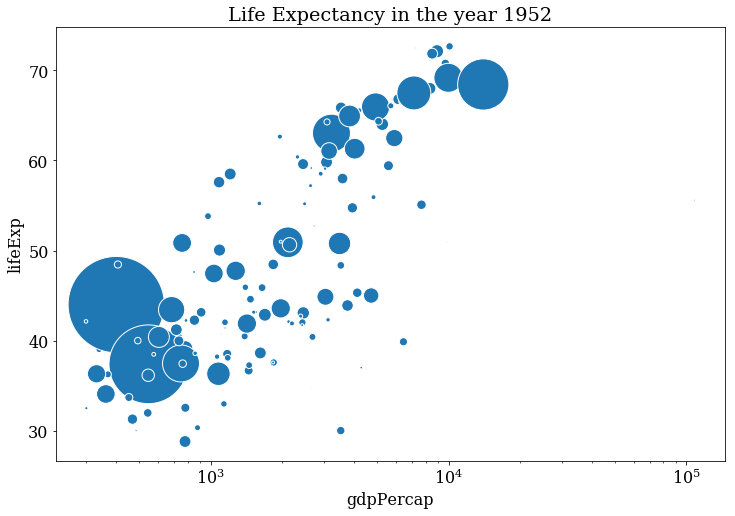

In [30]:
year1952.plot.scatter(figsize=(12,8),
                     x='gdpPercap', y='lifeExp', s=populations/60000,
                     title='Life Expectancy in the year 1952', edgecolors='white')
pyplot.xscale('log');

In [33]:
#pd.Categorical data type associates a numerical value for each category in a
#column containing qualitative (categorical data)
pd.Categorical(year1952['continent'])

[Asia, Europe, Africa, Africa, Americas, ..., Asia, Asia, Asia, Africa, Africa]
Length: 142
Categories (5, object): [Africa, Americas, Asia, Europe, Oceania]

In [35]:
colors = pd.Categorical(year1952['continent']).codes
type(colors)

numpy.ndarray

In [36]:
len(colors)

142

In [37]:
print(colors)
#each value/code of (0,1,2,3,4) corresponds to a continent category

[2 3 0 0 1 4 3 2 2 3 0 1 3 0 1 3 0 0 2 0 1 0 0 1 2 1 0 0 0 1 0 3 1 3 3 0 1
 1 0 1 0 0 0 3 3 0 0 3 0 3 1 0 0 1 1 2 3 3 2 2 2 2 3 2 3 1 2 2 0 2 2 2 2 0
 0 0 0 0 2 0 0 0 1 2 3 0 0 2 0 2 3 4 1 0 0 3 2 2 1 1 1 2 3 3 1 0 3 0 0 2 0
 3 0 2 3 3 0 0 3 2 0 0 3 3 2 2 0 2 0 1 0 3 0 3 1 1 1 2 2 2 0 0]


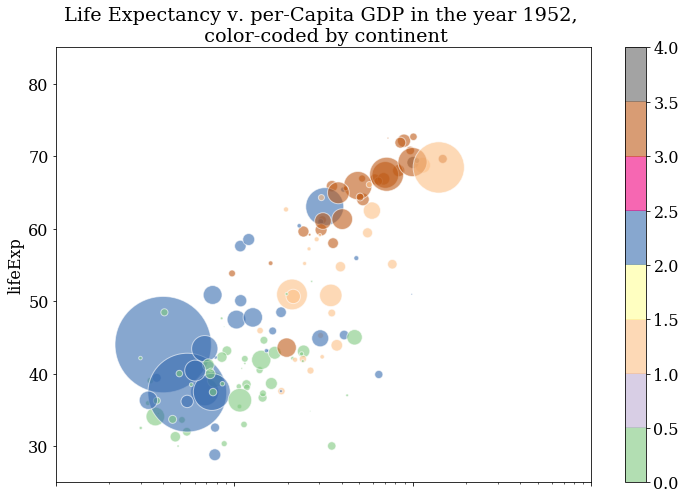

In [39]:
year1952.plot.scatter(figsize=(12,8),
                     x='gdpPercap', y='lifeExp', s=populations/60000,
                     c=colors, cmap='Accent',
                     title='Life Expectancy v. per-Capita GDP in the year 1952, \n color-coded by continent',
                     logx = 'True',
                     ylim = (25,85),
                     xlim = (1e2, 1e5),
                     edgecolors='white',
                     alpha=0.6);

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




1. I downloaded a dataset for life expectancy from a CSV file hosted online. I proceeded to familiarize myself with the dataset by finding out the number of rows and columns in the dataset using the '.shape' and '.info' functions. This allowed me to figure out if there were any missing values or missing data. I also found how many entries were available per year. Also, I created additional dataframes using the groupby() method to group data "by year" and "by country" and later grouped data "by continent" using the pd.Categorical function. Eventually, I plotted life expectancy vs. per-Capita GDP in the year 1952 for every country with available data. I was able to visualize these data more proficiently by color-coding countries by continent.

In [0]:
2. The most challenging part was to understand exactly how the different functions (i.e. groupby() & pd.Categorical()) were grouping the available data.

In [0]:
3. Again, really enjoyed the power of groupby and pd.Categorical!!

In [0]:
4. Now, I want to plot the rest of the available data. I would like to plot all the life expectancy data for all countries across several decades in one cohesive plot.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.